In [8]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

   25l   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.9 MB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.9 MB 1.2 MB/s eta 0:00:04━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/3.9 MB 1.7 MB/s eta 0:00:03━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.2/3.9 MB 2.3 MB/s eta 0:00:02━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.4/3.9 MB 2.7 MB/s eta 0:00:02━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.6/3.9 MB 3.3 MB/s eta 0:00:02━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/3.9 MB 3.9 MB/s eta 0:00:01━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.9/3.9 MB 3.6 MB/s eta 0:00:01━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/3.9 MB 3.9 MB/s eta 0:00:01━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/3.9 MB 4.1 MB/s eta 0:00:01━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/3.9 MB 4.1 MB/s eta 0:00:01━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/3.9 MB 4.1 MB/s eta 0:00:01━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/3.9 MB 3.6 MB/s eta 0:00:01━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/3.9 MB 3.4 MB/s e

In [1]:
#/default_exp app

In [2]:
#/export
from fastai.vision.all import *
# Following will download to /Users/bhaskarjayaraman/.fastai/data/oxford-iiit-pet/images
import gradio as gr

def is_cat(x): return x[0].isupper()

path = untar_data(URLs.PETS)/'images'
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

152207.25s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.220607,0.038834,0.010149,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.078021,0.026924,0.007442,00:48
1,0.048650,0.054720,0.013532,00:48
2,0.030282,0.031510,0.008119,00:48
3,0.018726,0.030564,0.007442,00:49
4,0.009299,0.031750,0.007442,00:49


In [8]:
learn.export('model.pkl')

PicklingError: Can't pickle <function is_cat at 0x112f25da0>: it's not the same object as __main__.is_cat

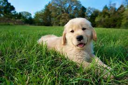

In [9]:
im = PILImage.create('dog.jpeg')
im.thumbnail((192,192))
im


In [10]:
#/export
learn = load_learner('modelone.pkl')



In [11]:
%time learn.predict(im)

CPU times: user 57 ms, sys: 256 ms, total: 313 ms
Wall time: 58.8 ms


('False', tensor(0), tensor([1.0000e+00, 6.8995e-12]))

In [13]:
#/export
categories = ('Dog', 'Cat')
def classify_image(img):
    pred,pred_idx,probs = learn.predict(img)
    # return {'image': img, 'prediction': categories[pred_idx], 'probability': probs[pred_idx].item()}
    print(probs)
    for i in map(float, probs):
        print(i)
    print(dict(zip(categories, map(float, probs))))
    return dict(zip(categories, map(float, probs)))
    

In [14]:
classify_image(im)

tensor([1.0000e+00, 6.8995e-12])
1.0
6.8994645066600135e-12
{'Dog': 1.0, 'Cat': 6.8994645066600135e-12}


{'Dog': 1.0, 'Cat': 6.8994645066600135e-12}

In [15]:
#/export
# image = gr.inputs.Image(shape=(192,192))
image = gr.Image()
# label = gr.outputs.Label()
label = gr.Label()
examples = [['dog.jpeg'], ['cat.jpeg'], ['dunno.jpeg']]
inf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
# inf.launch(share=True)
inf.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [16]:
import nbdev.export as exp

In [29]:
"""
# !pip install nbdev --upgrade

# exp.nb_export('app.ipynb')
# exp.notebook2script('app.ipynb')
# from nbdev import nbdev_export
try:
    from nbdev import nbdev_export
    print("nbdev is installed and import works!")
except ImportError as e:
    # print("Failed to import nbdev:", e)
    print(nbdev.__version__)


# notebook2script('app.ipynb')

# import nbdev
# nbdev.export.nb_export('app.ipynb', 'app')


# from notebook2script import convert_notebook
# convert_notebook('app.ipynb','app.py')

# import nbdev
# # import nbdev.export
# notebook_name = "app.ipynb"
# export_destination = "."
# nbdev.export.nb_export(notebook_name, export_destination) 

import nbdev
# path = Path('.')
# dir = path
# dir.ls()
# nbdev.export.nb_export(dir/'app.ipynb', 'app')
# print('Export successful')
nbdev.export.nb_export('app.ipynb', 'app')

````"""




2.3.13


In [7]:
import nbdev
import notebook2script
from nbdev import nbdev_export
nbdev_export('app.ipynb')
# from notebook2script import convert_notebook
nbdev.export.nb_export('app.ipynb', './')
# convert_notebook('app.ipynb','app.py')
notebook2script.convert_notebook('app.ipynb','app.py')




ImportError: cannot import name 'formatargspec' from 'inspect' (/opt/homebrew/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/inspect.py)